### references
- https://www.researchgate.net/publication/258797916_Levy_Flights_1f_Noise_and_Self_Organized_Criticality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [2]:
import mistree as mist

In [ ]:
import statsmodels.api as sm

In [ ]:
from childes_mi.information_theory import mutual_information as mi
# distances of MI to sample at
distances = np.unique(np.logspace(0, 4, 100, base=10).astype('int'))

In [ ]:
??mist.get_levy_flight

In [ ]:
size = 1000000
x, y = mist.get_levy_flight(size, mode='2D', box_size = 100, periodic=False, t_0=3, alpha=-1)

In [ ]:
plt.scatter(x[:100000],y[:100000], s=1, alpha = 0.1)

In [ ]:
plt.plot(x[:4000], y[:4000])
print(np.max(x), np.max(y))

In [ ]:
#walk_vector = np.vstack([x,y])
# distance as a function of step size
#autocorrelation = sm.tsa.acf(x, nlags = 1000)
#fig, ax = plt.subplots(figsize=(5,5))
#ax.plot(autocorrelation)
#ax.set_yscale('log')
#ax.set_xscale('log')

### bin

In [ ]:
min_ = np.min(np.concatenate([x,y]))
max_ = np.max(np.concatenate([x,y]))

In [ ]:
np.concatenate([x,y])

In [ ]:
bins = np.linspace(0,100, 100)
x_binned = np.digitize(x, bins)
y_binned = np.digitize(y, bins)

In [ ]:
xy_symbolic = [i+j for i, j in zip(tqdm(x_binned.astype(str)), y_binned.astype(str))]

In [ ]:
len(xy_symbolic)

In [ ]:
distances = np.unique(np.logspace(0, 2, 100, base=10).astype('int'))

In [ ]:
# original model
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [xy_symbolic], distances=distances, n_jobs=-1
)

In [480]:
MI_DF =  pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances, "no_markov"]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "shuffle"],
)

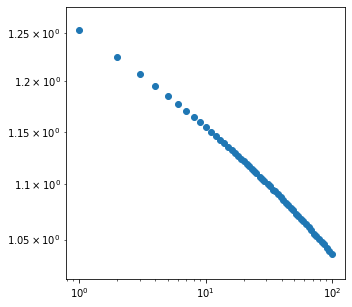

In [481]:
row = MI_DF.iloc[len(MI_DF)-1]
fig, ax = plt.subplots(figsize=(5,5))
MI = row.MI-row.shuff_MI

ax.scatter(distances, MI)
ax.set_yscale('log')
ax.set_xscale('log')

In [482]:
distances = np.unique(np.logspace(0, 4, 100, base=10).astype('int'))

In [483]:
# original model
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [xy_symbolic], distances=distances, n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done  38 out of  84 | elapsed:  1.0min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  55 out of  84 | elapsed:  1.2min remaining:   36.7s
[Parallel(n_jobs=-1)]: Done  72 out of  84 | elapsed:  1.2min remaining:   11.7s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:  1.2min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  38 out of  84 | elapsed:    3.9s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  55 out of  84 | elapsed:    5.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  72 out of  84 | elapsed:    6.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    6.9s finished


In [484]:
MI_DF =  pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances, "no_markov"]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "shuffle"],
)

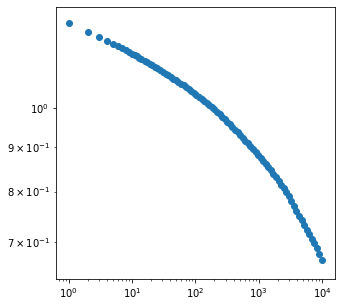

In [485]:
row = MI_DF.iloc[len(MI_DF)-1]
fig, ax = plt.subplots(figsize=(5,5))
MI = row.MI-row.shuff_MI

ax.scatter(distances, MI)
ax.set_yscale('log')
ax.set_xscale('log')

### cluster

In [445]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [446]:
walk_vector = np.vstack([x,y]).T
walk_vector.shape

(500000, 2)

In [447]:
kmeans = MiniBatchKMeans(n_clusters=10, random_state=0, verbose=1).fit(walk_vector)

Init 1/3 with method: k-means++
Inertia for init 1/3: 4265675.000000
Init 2/3 with method: k-means++
Inertia for init 2/3: 4229383.000000
Init 3/3 with method: k-means++
Inertia for init 3/3: 4821337.500000
Minibatch iteration 1/500000: mean batch inertia: 12651.042500, ewa inertia: 12651.042500 
Minibatch iteration 2/500000: mean batch inertia: 15190.672500, ewa inertia: 12652.058350 
Minibatch iteration 3/500000: mean batch inertia: 19265.352500, ewa inertia: 12654.703662 
Minibatch iteration 4/500000: mean batch inertia: 16926.936250, ewa inertia: 12656.412552 
Minibatch iteration 5/500000: mean batch inertia: 13208.163750, ewa inertia: 12656.633252 
Minibatch iteration 6/500000: mean batch inertia: 13263.378750, ewa inertia: 12656.875950 
Minibatch iteration 7/500000: mean batch inertia: 14984.405000, ewa inertia: 12657.806959 
Minibatch iteration 8/500000: mean batch inertia: 12534.553750, ewa inertia: 12657.757658 
Minibatch iteration 9/500000: mean batch inertia: 12943.403750, e

kmeans.labels_

### compute MI

In [449]:
# original model
(MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
    [kmeans.labels_], distances=distances, n_jobs=-1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  38 out of  84 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  55 out of  84 | elapsed:    0.2s remaining:    0.1s


[Parallel(n_jobs=-1)]: Done  72 out of  84 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.3s finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s


[Parallel(n_jobs=-1)]: Done  38 out of  84 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  55 out of  84 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  72 out of  84 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.4s finished


In [450]:
MI_DF =  pd.DataFrame(
    [[MI, MI_var, shuff_MI, shuff_MI_var, distances, "no_markov"]],
    columns=["MI", "MI_var", "shuff_MI", "shuff_MI_var", "distances", "shuffle"],
)

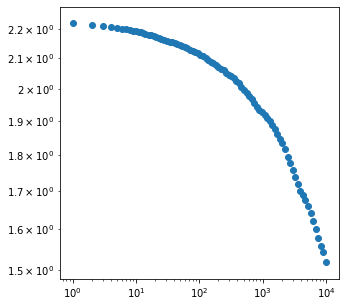

In [451]:
row = MI_DF.iloc[len(MI_DF)-1]
fig, ax = plt.subplots(figsize=(5,5))
MI = row.MI-row.shuff_MI

ax.scatter(distances, MI)
ax.set_yscale('log')
ax.set_xscale('log')

In [271]:
# spatial distance as a function of sequential distance

In [272]:
walk_vector = np.vstack([x,y]).T[:1000]

In [273]:
walk_vector.shape

(1000, 2)

In [274]:
from scipy.spatial import distance_matrix

In [275]:
dist = distance_matrix(walk_vector, walk_vector)

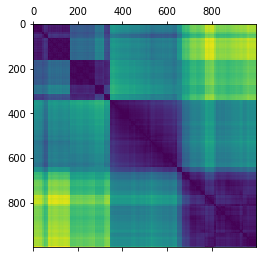

In [276]:
plt.matshow(dist)

In [277]:
np.product(np.shape(dist))

1000000

In [278]:
x = np.tile(np.arange(len(dist)), len(dist))

In [279]:
y = dist.flatten()

In [280]:
len(x), len(y)

(1000000, 1000000)

In [281]:
x[:10000]

array([  0,   1,   2, ..., 997, 998, 999])

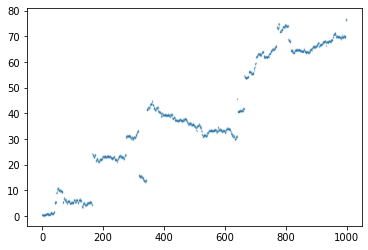

In [282]:
plt.scatter(x[:10000], y[:10000], alpha = 0.1, s=0.1)